In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import random
import scipy

In [2]:
# plot/colors definitions
cpath = '/n/groups/datta/win/longtogeny/code/notebooks/exploration/Dana'
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

plt.style.use('dark_background')

In [3]:
## upload data frame females
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_all.parquet')
mdf_all = pd.read_parquet(path)
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_most_used.parquet')
mdf = pd.read_parquet(path)

In [4]:
## filter out bad days - 
bad=[221, 228 ,243, 366]
#temp = mdf.loc[~mdf.index.isin(list(bad))]
mdf.drop(bad, level=0, axis=0, inplace=True)

In [5]:
## entropy calculations

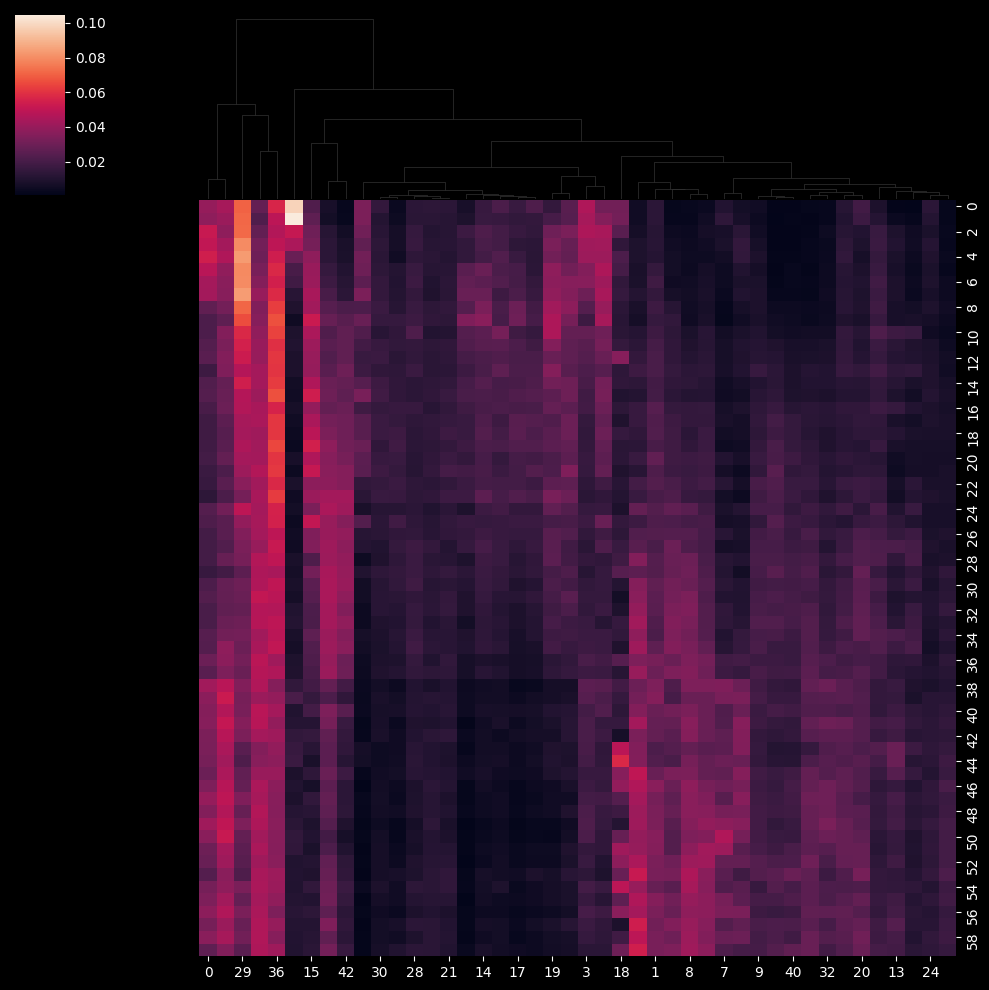

In [6]:
# get average syllable change over age
mean_su = mdf.groupby('age').mean()
cmg=sns.clustermap(mean_su.to_numpy(),
                   col_cluster=True,row_cluster=None,
                   method='average',
                   metric='sqeuclidean',
                   )
s=cmg.dendrogram_col.reordered_ind #reordered columns of the matrix

In [7]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Entropy by age males", fontsize=18, y=0.95)
to_plot=[]

n=0
ages=[]
ent=[]
exp=[]
mouse=[]
for age,_df in enumerate(mdf.groupby('age')):
    ages.extend(_df[1].index.get_level_values(0).to_numpy())
    mouse.extend(_df[1].index.get_level_values(1).to_numpy())
    exp.extend(_df[1].index.get_level_values(2).to_numpy())
    data_temp = _df[1].to_numpy()[:,s]
    #data_temp = _df[1].to_numpy()
    ent.extend(scipy.stats.entropy(data_temp, axis=1))
    to_plot.append(data_temp)
    #fig, ax = plt.subplots()
    #fig.set_size_inches(6,4)
    #ax = plt.subplot(10, 7, n + 1)
    #sns.barplot(data_temp, errorbar='se',ax=ax)
    #sns.lineplot(np.mean(data_temp, axis=0),ax=ax)
    #ax.set_title('syllable usage ' +str(_df[1].index.get_level_values(0).unique().to_numpy()))
    #ax.set_ylim(0,0.12)
    n=n+1


<Figure size 1500x1500 with 0 Axes>

In [8]:
age_labels=np.unique(ages)

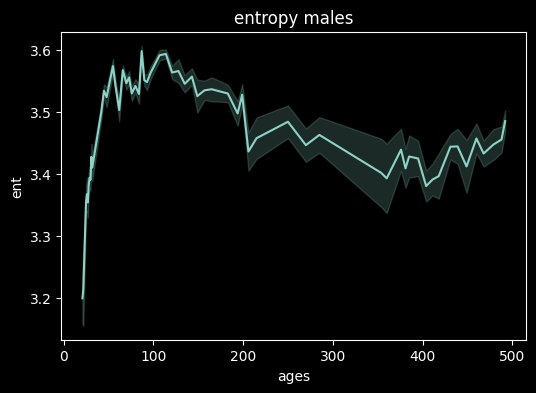

In [9]:
# plot entropy values
df=pd.DataFrame()
df['ages']=ages
df['ent']=ent
df['exp']=exp
df['mouse']=mouse
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="ages", y="ent", estimator='mean', errorbar='se')
ax.set_title('entropy males')
#ax.set_ylim(0.0015,0.003)
em = df.copy()

In [10]:
len(to_plot)

60

In [11]:
from scipy.ndimage.filters import gaussian_filter1d

In [12]:
# prepare data
data=df.copy()
ind = data['ages'].unique()
concat = pd.DataFrame()
for m, _df in data.groupby('mouse'):
    #_df=_df.drop_duplicates(subset=['ages'])
    temp= gaussian_filter1d(_df['ent'], sigma=3)
    _df['ent'] = temp
    concat=pd.concat([concat,_df])

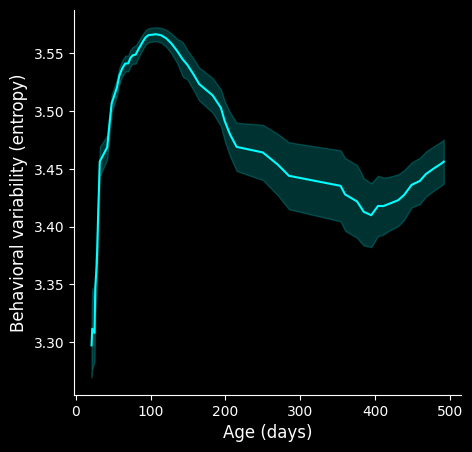

In [17]:
plt.style.use("dark_background")
fig, ax = plt.subplots()
fig.set_size_inches(5,5) 
sns.lineplot(data=concat, x="ages", y="ent", estimator='mean', errorbar='se',c='cyan')
#ax.set_title('entropy males')
ax.set_ylabel('Behavioral variability (entropy)', fontsize=12)
ax.set_xlabel('Age (days)', fontsize=12)
#ax.set_ylim(0.0015,0.003)
sns.despine()
em = df.copy()
plt.savefig(data_loc +'long_entropy_male_line.pdf', bbox_inches='tight')

In [ ]:
## make movie

                                                                                                                                                              

t: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [05:54<00:00,  3.08it/s, now=None]

                                                                                                                                                              

t: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [05:54<00:00,  3.08it/s, now=None]

t: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [07:07<00:00,  2.92it/s, now=None]

Moviepy - Building video /n/groups/datta/win/longtogeny/code/notebooks/exploration/Dana/figs/entropy_long.mp4.
Moviepy - Writing video /n/groups/datta/win/longtogeny/code/notebooks/exploration/Dana/figs/entropy_long.mp4




t:  10%|██████████▉                                                                                                  | 6/60 [00:01<00:14,  3.72it/s, now=None]

                                                                                                                                                              
t: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:18<00:00,  3.31it/s, now=None]

IndexError: list index out of range

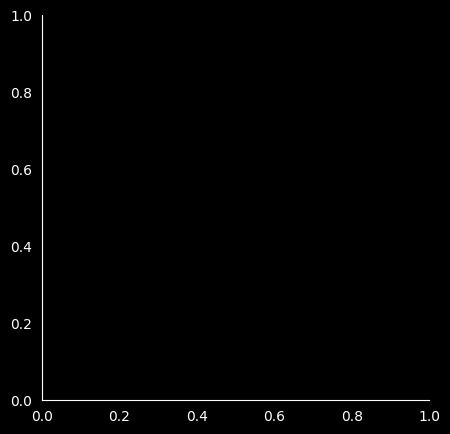

In [16]:
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
from IPython import display
 
# numpy array
#x = np.linspace(-2, 2, 200)
 
# duration of the video
fps=5
duration = int(np.floor(len(to_plot)/fps))
 
# matplot subplot
plt.style.use("dark_background") 
fig, ax = plt.subplots()
fig.set_size_inches(5,5) 
# method to get frames
i=0
def make_frame(t):
    global i
    global ind
    # clear
    ax.clear()
    # plotting line
    data_temp=to_plot[i]
    sns.barplot(data_temp, errorbar='se',ax=ax)
    sns.lineplot(np.mean(data_temp, axis=0),ax=ax)
    ax.set_title('syllable usage on day ' +str(age_labels[i]),fontsize = 12)
    ax.set_ylim(0,0.1)
    ax.set_xlabel('syllables')
    ax.set_ylabel('fraction of use')
    sns.despine()
    plt.xticks([])
    #plt.axis('off')
    #plt.title('day '+str(xmale.days.max()),fontsize = 12)
    #plt.title(ind[i])
    i=i+1
    # returning numpy image
    return mplfig_to_npimage(fig)
 
# creating animation
animation = VideoClip(make_frame, duration = duration)
animation.write_videofile(data_loc+"entropy_long.mp4",fps=fps)
# displaying animation with auto play and looping
#animation.ipython_display(fps = fps, loop = False, autoplay = False)


In [ ]:
    fig, ax = plt.subplots()
    fig.set_size_inches(5,5) 
    sns.lineplot(data=xmale,x='0',y='1',hue='mouse',marker='o',hue_order=['02_01','02_02','02_03','02_04'], ax=ax, 
                 legend = False,
                 palette = "husl")
    ax.set_xlim([5,15])
    ax.set_ylim([-3,8])
    sns.despine()
    plt.axis('off')